In [5]:
# optional but useful for debugging - reimports modules after editing and saving .py files
%load_ext autoreload
%autoreload 2

%config Completer.use_jedi = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np, pandas as pd, scipy, h5py
import astropy
from astropy import units as u
import astromet
from astromet.track import design_matrix, design_1d
#import dev.astromet.astromet as astromet
import matplotlib.pyplot as plt
import matplotlib as mpl
import tqdm
import scanninglaw.times
from scanninglaw.source import Source

In [7]:
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['axes.facecolor']='white'
mpl.rcParams['axes.edgecolor']='k'
mpl.rcParams['axes.linewidth']=2
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['text.color'] = 'k'
#mpl.rcParams['xtick.major.width'] = 2
#mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.color']='k'
mpl.rcParams['ytick.color']='k'
mpl.rcParams['axes.labelcolor']='k'

mpl.rcParams['font.size']=12
mpl.rcParams['xtick.direction']='in'
mpl.rcParams['ytick.direction']='in'
mpl.rcParams['xtick.major.size'] = 5.5
mpl.rcParams['ytick.major.size'] = 5.5
mpl.rcParams['xtick.minor.size'] = 3.5
mpl.rcParams['ytick.minor.size'] = 3.5

In [10]:
data = {}
with h5py.File('/data/vault/asfe2/Conferences/EDR3_workshop/gums_sample.h', 'r') as hf:
    for key in hf.keys():
        data[key] = hf[key][...]

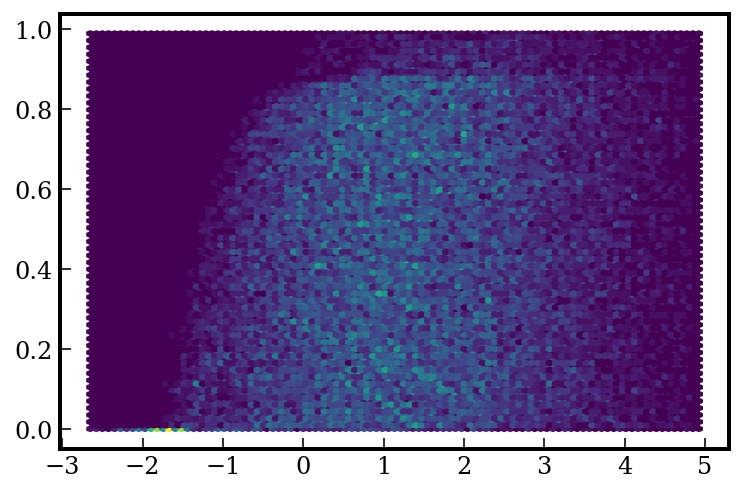

In [13]:
plt.hexbin(np.log10(data['semimajor_axis']),data['eccentricity'])

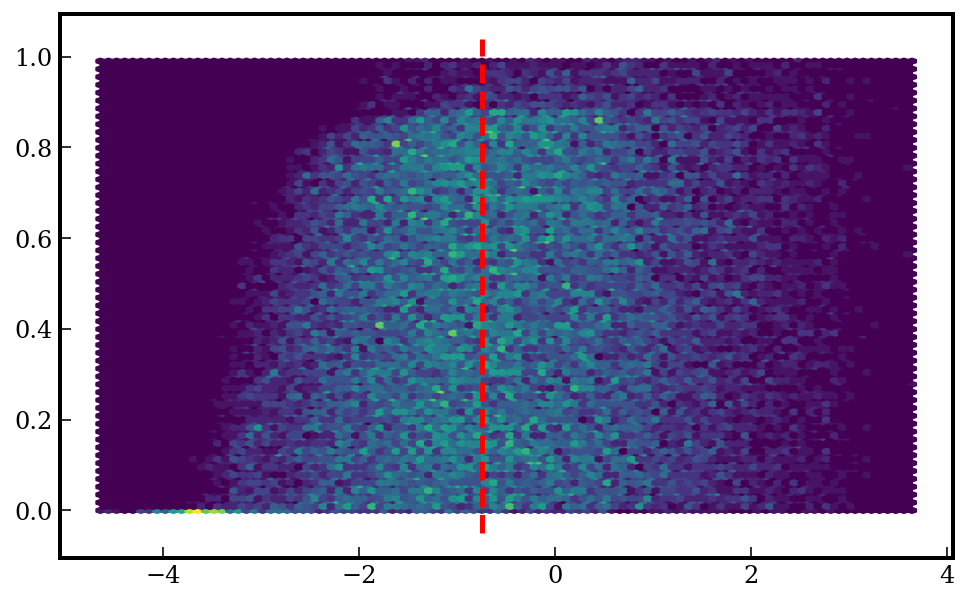

In [18]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
plt.hexbin(np.log10(data['semimajor_axis']/data['barycentric_distance']),data['eccentricity'])
plt.plot(np.log10([0.18,0.18]), ax.get_ylim(), '--r')

In [23]:
print(f"Binaries: {np.sum(data['binary'])}")
print(f"Unresolved: {np.sum((1+data['eccentricity'])*data['semimajor_axis']/data['barycentric_distance']<0.18)}")

Binaries: 32708
Unresolved: 13030
